In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("Book2.csv")

In [3]:
df_index.head()

,Unnamed: 0,Year,Month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1364
2,2,2017,10,2.50,5.3,1528
3,3,2017,5,2.50,5.4,1452
4,4,2017,8,2.50,6.0,1290


In [12]:
# Drop unnecessary column
df_index.drop(columns=["Unnamed: 0","Year","Month"], axis=1, inplace=True)


In [13]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1364
2,2.50,5.3,1528
3,2.50,5.4,1452
4,2.50,6.0,1290


In [14]:
# Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

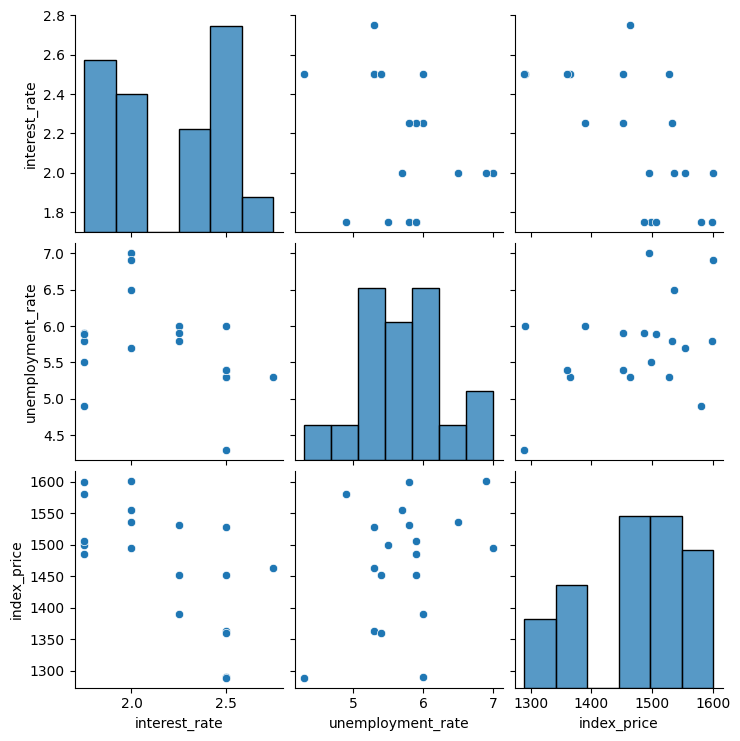

In [15]:
# Let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [16]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.352612,-0.646997
unemployment_rate,-0.352612,1.000000,0.372335
index_price,-0.646997,0.372335,1.000000


Text(0, 0.5, 'Unemployment rate')

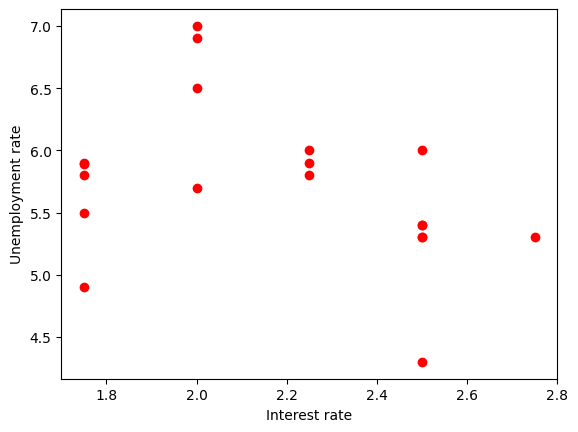

In [18]:
# Visualize the datapoints more closely

plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')

plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [19]:
# Independent and dependent features
x = df_index.iloc[:,:-1]
y = df_index.iloc[:, -1]

In [20]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.4
4,2.50,6.0


In [21]:
y

0     1464
1     1364
2     1528
3     1452
4     1290
5     1289
6     1360
7     1390
8     1452
9     1532
10    1495
11    1536
12    1601
13    1599
14    1580
15    1499
16    1486
17    1506
18    1555
Name: index_price, dtype: int64

In [22]:
# Train test split
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [26]:
import seaborn as sns

In [31]:
# sns.regplot(df_index['interest_rate'],df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

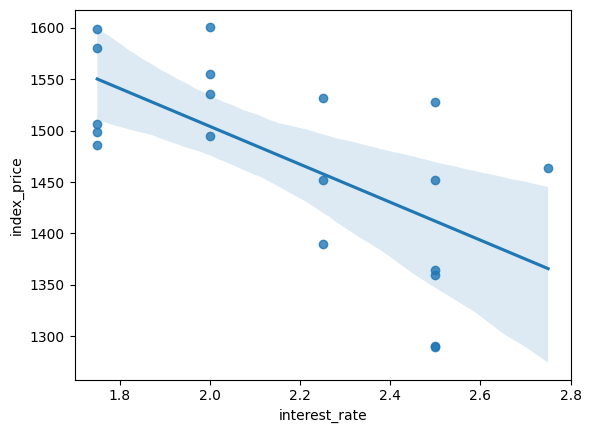

In [30]:
sns.regplot(
    x='interest_rate',
    y='index_price',
    data=df_index
)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

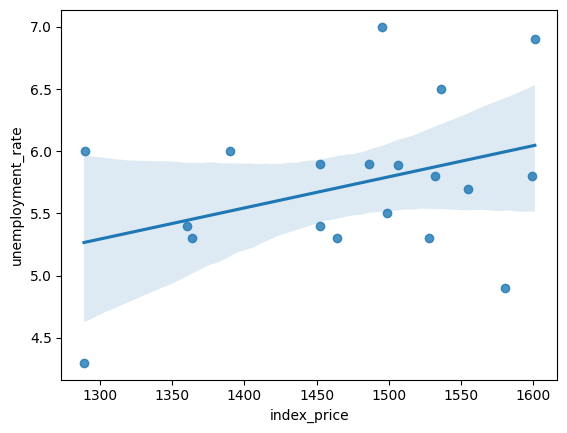

In [32]:
sns.regplot(
    x='index_price',
    y='unemployment_rate',
    data=df_index
)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [35]:
x_train

array([[-1.10249182,  0.14437602],
       [ 1.33459536, -0.76610339],
       [-1.10249182, -0.03771986],
       [-1.10249182, -0.58400751],
       [-1.10249182,  0.12616643],
       [ 1.33459536, -0.94819928],
       [ 0.52223297, -0.03771986],
       [-0.29012943, -0.21981574],
       [ 1.33459536,  0.3264719 ],
       [-0.29012943,  1.96533485],
       [ 0.52223297,  0.3264719 ],
       [-0.29012943,  2.14743074],
       [-1.10249182, -1.67658281],
       [ 1.33459536, -0.76610339]])

In [36]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [37]:
regression.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
# Cross Validation

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error',
                                   cv = 3)

In [42]:
validation_score

array([ -8189.30419606, -11677.11386007,  -4902.82834016])

In [43]:
np.mean(validation_score)

np.float64(-8256.415465430278)

In [44]:
# Prediction

y_pred = regression.predict(x_test)

In [45]:
y_pred

array([1416.0113829 , 1473.88842852, 1573.19070154, 1469.97132894,
       1521.58101524])

In [46]:
## Performance matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

10788.245378670894
89.12401826821046
103.8664786091783


In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

# Display adjusted R-squared
print(1 - (1-score)*(len(y_test) - 1)/ (len(y_test)-x_test.shape[1]-1))

-0.46946787875543405
-1.938935757510868


## Assumption

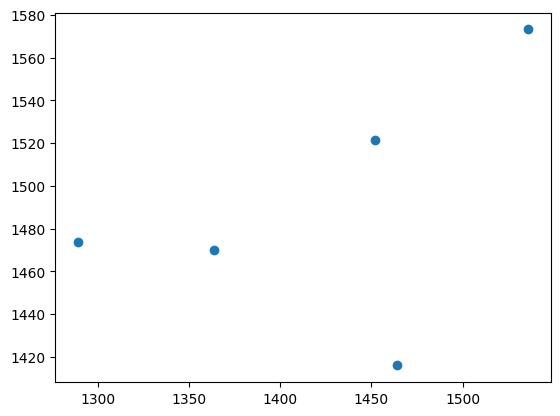

In [48]:
plt.scatter(y_test,y_pred)

In [49]:
residuals = y_test - y_pred
print(residuals)

0      47.988617
5    -184.888429
11    -37.190702
1    -105.971329
8     -69.581015
Name: index_price, dtype: float64


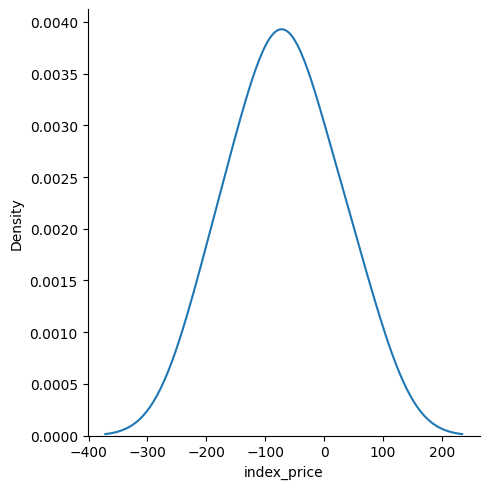

In [50]:
## Plot this residuals

sns.displot(residuals, kind='kde')

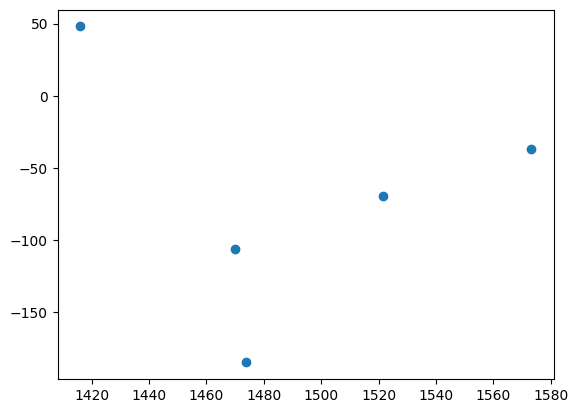

In [51]:
 ## Scatterplot with prediction and residuals
plt.scatter(y_pred, residuals)

### OLS Linear regresssion

In [53]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.165
Method:                 Least Squares   F-statistic:                           0.008080
Date:                Sat, 10 Jan 2026   Prob (F-statistic):                       0.992
Time:                        20:42:57   Log-Likelihood:                         -122.18
No. Observations:                  14   AIC:                                      248.4
Df Residuals:                      12   BIC:                                      249.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -55.0286    433.759     -0.127      0.901   -1000.108     890.050
x2            -2.8635    433.759     -0.007      0.995    -947.942     942.215
==============================================================================
Omnibus:                        1.121   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.732
Skew:                          -0.063   Prob(JB):                        0.693
Kurtosis:                       1.887   Cond. No.                         1.12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
print(regression.coef_)

[-55.02856357  -2.86350428]
